c:\Users\everett\Documents\GitHub\StormReactor\StormReactor\wqConfig.py:26: UserWarning: Model not provided to config. Element and pollutant validation will not be performed.
  warnings.warn("Model not provided to config. Element and pollutant validation will not be performed.")


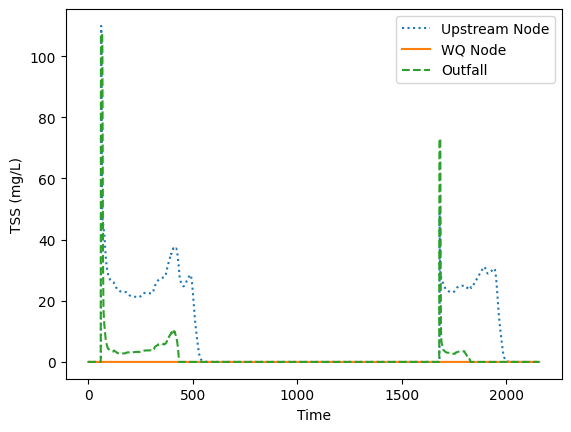

In [ ]:


'''
PySWMM and StormReactor Code Example A
Author: Brooke Mason
Version: 1
Date: December 21, 2022
'''
# Import libraries
from pyswmm import Simulation, Nodes
from StormReactor import waterQuality, WQStorage
import matplotlib.pyplot as plt


from swmmio import Model
mdl = Model(r'StormReactor/examples/Example1_WQ.inp')

# Define water quality configuration dictionary

# TODO: change config to a class; will be cleaner than nested dictionaries
# NOTE: parameters are method-dependant, everything else is pretty standardized


from StormReactor import wqConfig

configs = []


config = wqConfig(
    element_id='17',
    element_type='node',
    pollutant='TSS',
    method='SewageSettling',
    parameters={'C': 50.0})
configs.append(config)


config = wqConfig(
    element_id='17',
    element_type='node',
    pollutant='TSS',
    method='SewageResuspension',
    parameters={'C': 50.0})
configs.append(config)




# Create lists to save TSS results
UpstreamNode_TSS = []
WQNode_TSS = []
OutfallNode_TSS = []
ok = []
# Initalize SWMM simulation
with Simulation(r'StormReactor/examples/Example1_WQ.inp') as sim:
    # Node information
    UpstreamNode = Nodes(sim)['24']
    WQNode = Nodes(sim)['17']
    OutfallNode = Nodes(sim)['18']

    # Initialize StormReactor
    WQ = waterQuality(sim, configs)

    # Launch a simulation
    for step in sim:
        # Update water quality each simulation step
        WQ.updateWQState()
        ok.append(WQ.storage.df.iloc[0,0])
        # Get and save TSS concentrations
        UpstreamNode_TSS.append(UpstreamNode.pollut_quality['TSS'])
        WQNode_TSS.append(WQNode.pollut_quality['TSS'])
        OutfallNode_TSS.append(OutfallNode.pollut_quality['TSS'])

# Plot TSS concentrations
plt.plot(UpstreamNode_TSS, ':', label="Upstream Node")
plt.plot(WQNode_TSS, '-', label="WQ Node")
plt.plot(OutfallNode_TSS, '--',label="Outfall")
plt.xlabel("Time")
plt.ylabel("TSS (mg/L)")
plt.legend()
plt.show()


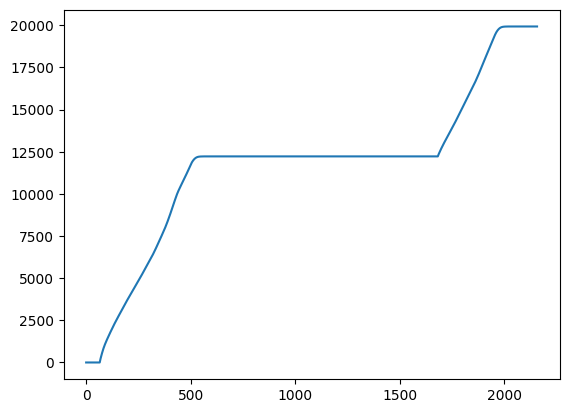

In [2]:
plt.plot(ok)